**Importing libraries**

---




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Dataset**


---



In [ ]:
Reviews=pd.read_csv("/content/drive/MyDrive/Data/Restaurant_reviews.csv",usecols=['Review','Liked'])

**Exploring the Dataset**

---



In [ ]:
# First 5 Data of our Dataset
Reviews.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Last 5 Data of our Dataset
Reviews.tail(5)

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
Reviews.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
Reviews.shape

(1000, 2)

In [ ]:
#Counting Positive Reviews
PositiveCount=len(Reviews[Reviews['Liked']==1])
PositiveCount

500

In [ ]:
#Counting Negative Reviews
NegativeCount=len(Reviews[Reviews['Liked']==0])
NegativeCount

500

**Visualizing most frequently occuring words**

---



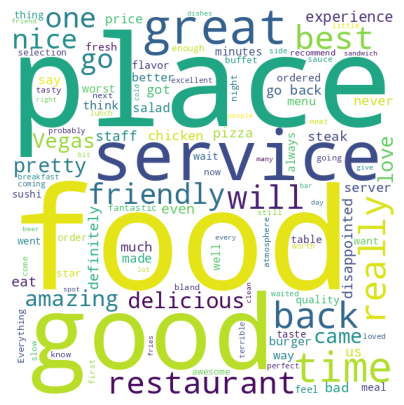

In [ ]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt


def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS)

    # Create WordCloud
    word_cloud = WordCloud(width = 550, height = 550,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 10).generate(text)

    # Set wordcloud figure size
    plt.figure(figsize = (5, 5))

    # Show image
    plt.imshow(word_cloud)

    # Remove Axis
    plt.axis("off")

    # show plot
    plt.show()

paragraph=' '.join(Reviews.Review.tolist())
word_cloud(paragraph)

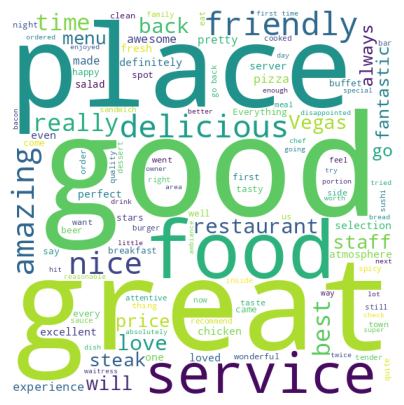

In [ ]:
# Word cloud for positive reviews
paragraph=' '.join(Reviews[Reviews.Liked==1].Review.tolist())
word_cloud(paragraph)

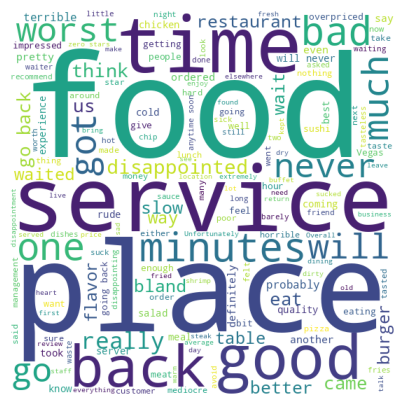

In [ ]:
# Word cloud for Negative reviews
paragraph=' '.join(Reviews[Reviews.Liked==0].Review.tolist())
word_cloud(paragraph)

**Data Preprocessing**

---



In [ ]:
import nltk
import re
nltk.download('stopwords') #Stopwords remove unwanted words in a sentence
nltk.download('wordnet')  #Combines synonyms of all similar words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stem = PorterStemmer()
lematize = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
corpus=[]
for i in range(len(Reviews)):
   rev =re.sub('[^a-zA-Z]',' ' , Reviews['Review'][i])
   rev=rev.lower()
   rev=rev.split()
   stopword_english = stopwords.words('english')
   stopword_english.remove('not')
   not_english_stopwords=[stem.stem(i)  for i  in rev if not i in set(stopword_english)]
   message=' '.join(not_english_stopwords)
   corpus.append(message)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [ ]:
corpus[0:20]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like']

In [ ]:
corpus[20:30]

['burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi']

**Model Building**

---



In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier  #Random Forest

In [ ]:
#Assigning CountVectorizer() function to a variable
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=Reviews.iloc[:,-1].values #Assigning Liked column to y variable

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 1566)
(300, 1566)
(700,)
(300,)


**Model Evaluation**

---



In [ ]:
classifier=RandomForestClassifier(n_estimators=330,criterion='entropy')
classifier.fit(x_train,y_train)

#Predicting the Test set results
y_pred = classifier.predict(x_test)

accuracy_Randomforest=round(classifier.score(x_test,y_test)*100,2)
print("The accuracy is "+ str(accuracy_Randomforest)+'%')

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix \n ", cm)

The accuracy is 77.0%
Confusion Matrix 
  [[130  13]
 [ 56 101]]


**Model Prediction**

---



In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
def predict_review(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [ ]:
result = ['Oops! Negetive Review','Good! Positive Review']
def predict_review(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    if classifier.predict(temp == 1): return(result[1])
    else: return(result[0])

In [ ]:
msg='The dinning and food was very Good!!!'
predict_review(msg)

'Good! Positive Review'

In [ ]:
msg = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'
predict_review(msg)

'Good! Positive Review'

In [ ]:
msg='The dinning and food was outstanding!!! and was good customer service'
predict_review(msg)

'Good! Positive Review'

In [ ]:
msg='The dinning and food was outstanding!!!'
predict_review(msg)

'Oops! Negetive Review'

**Experimenting Other Models**

---



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#Import scikit-learn metrics module for accuracy calculation


# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(x_train, y_train)

predicted= clf.predict(x_test)
Acc_MultinomialNm = metrics.accuracy_score(y_test, predicted)*100
print("MultinomialNB Accuracy:", Acc_MultinomialNm)


MultinomialNB Accuracy: 76.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
liR = LinearRegression()
loR = LogisticRegression()
liR.fit(x_train, y_train)
loR.fit(x_train, y_train)
predict_1=liR.predict(x_test)
predict_2=loR.predict(x_test)
liR_acc=metrics.accuracy_score(y_test, predicted)*100
loR_acc=metrics.accuracy_score(y_test, predicted)*100
print(liR_acc)
print(loR_acc)

76.0
76.0


In [ ]:
from sklearn.svm import SVC # Support Vector Classifier
model=SVC()
model.fit(x_train, y_train)
predicted= model.predict(x_test)
Acc_SVC=metrics.accuracy_score(y_test, predicted)*100
print("SVC Accuracy:", Acc_SVC)



SVC Accuracy: 75.66666666666667


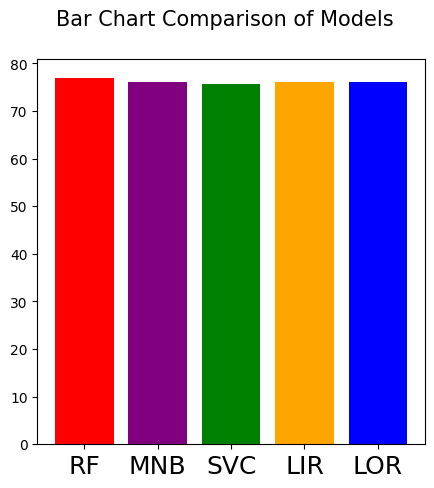

In [ ]:
Models=("RF","MNB","SVC","LIR","LOR")
scores = (accuracy_Randomforest,Acc_MultinomialNm,Acc_SVC,liR_acc,loR_acc)
y_pos = np.arange(1,6)
colors = ("red","purple","green","orange","blue")
plt.figure(figsize=(5,5))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,Models,fontsize=18)
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()